In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import os
import cv2

import numpy as np
import splitfolders

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
labels = ['Normal', 'Potholes']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
tf.__version__

'2.9.1'

In [6]:
data = get_data('Dataset')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/var/folders/7c/s_44qy7x2xl31y_8nm69xyg80000gn/T/ipykernel_54049/3542315726.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [7]:
splitfolders.ratio("Dataset", output="output",
    seed=1337, ratio=(.6,.4), group_prefix=None, move=False) # default values

Copying files: 3681 files [00:07, 497.85 files/s] 


In [8]:
train = get_data('output/train')
val = get_data('output/val')
#test = get_data('output/test')

'NoneType' object is not subscriptable


/var/folders/7c/s_44qy7x2xl31y_8nm69xyg80000gn/T/ipykernel_54049/3542315726.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


'NoneType' object is not subscriptable


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

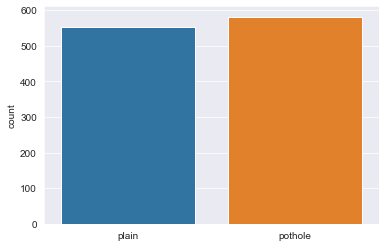

In [9]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("plain")
    else:
        l.append("pothole")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Normal')

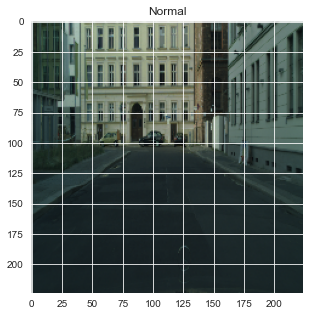

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Potholes')

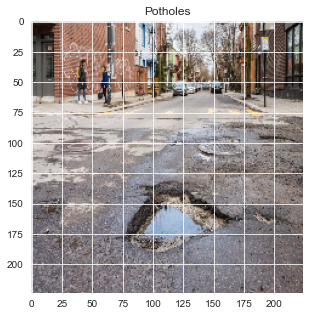

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [12]:
x_train = []
y_train = []
x_val = []
y_val = []
#x_test = []
#y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

''''
for feature, label in test:
  x_test.append(feature)
  y_test.append(label)
''''

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

''''
x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
''''

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [14]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

2023-02-15 12:25:18.700335: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/Applications/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [17]:
model_file = 'model/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5'

#maximizing val_accuracy, store only the best models  
checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq="epoch")

#If after 3 epochs the val_accuracy does not improve just stop 
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')

In [18]:
history = model.fit(x_train,y_train,epochs = 500,batch_size = 32, validation_data = (x_val, y_val), verbose = 2,shuffle = True,callbacks = [checkpoint,early])

Epoch 1/500


/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.52353, saving model to model/weights.01-0.52.hdf5
36/36 - 30s - loss: 0.6807 - accuracy: 0.5467 - val_loss: 0.6532 - val_accuracy: 0.5235 - 30s/epoch - 820ms/step
Epoch 2/500

Epoch 2: val_accuracy improved from 0.52353 to 0.53382, saving model to model/weights.02-0.53.hdf5
36/36 - 29s - loss: 0.6447 - accuracy: 0.5441 - val_loss: 0.6315 - val_accuracy: 0.5338 - 29s/epoch - 810ms/step
Epoch 3/500

Epoch 3: val_accuracy improved from 0.53382 to 0.57941, saving model to model/weights.03-0.58.hdf5
36/36 - 30s - loss: 0.6218 - accuracy: 0.5670 - val_loss: 0.6078 - val_accuracy: 0.5794 - 30s/epoch - 830ms/step
Epoch 4/500

Epoch 4: val_accuracy improved from 0.57941 to 0.62059, saving model to model/weights.04-0.62.hdf5
36/36 - 27s - loss: 0.6055 - accuracy: 0.6332 - val_loss: 0.5887 - val_accuracy: 0.6206 - 27s/epoch - 750ms/step
Epoch 5/500

Epoch 5: val_accuracy improved from 0.62059 to 0.68382, saving model to model/weights.05-0.68.hdf5
36/

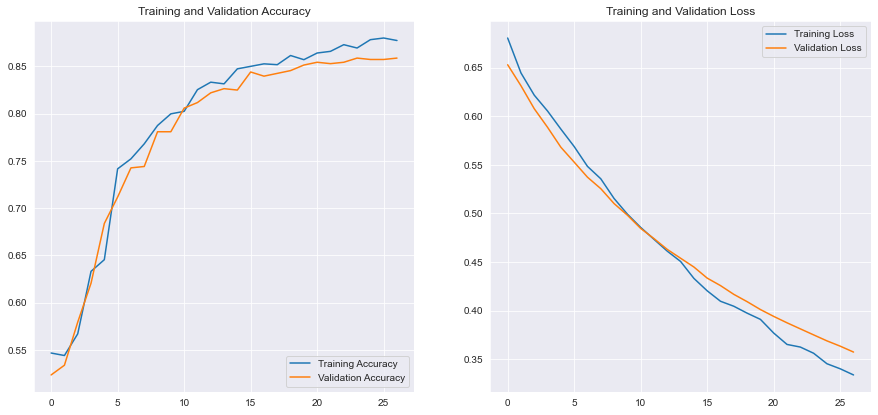

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(27)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
y_pred=model.predict(x_val)
y_pred=np.argmax(y_pred,axis=1)

15/15 [==============================] - 2s 133ms/step


In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       193
           1       0.96      0.86      0.91       256

    accuracy                           0.90       449
   macro avg       0.90      0.91      0.90       449
weighted avg       0.91      0.90      0.90       449



In [23]:
print(confusion_matrix(y_pred,y_val))

[[184   9]
 [ 35 221]]


In [35]:
def performance_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i] == y_hat[i]==1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] == 0:
            FP += 1
        if y_hat[i] == y_actual[i] == 0:
            TN +=1
        if y_hat[i] == 0 and y_actual[i] == 1:
            FN +=1

    return(TP, FP, TN, FN)

In [36]:
TP, FP, TN, FN = performance_measure(y_test,y_pred)

In [38]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC)

0.9608695652173913 0.8401826484018264 0.86328125 0.9533678756476683 0.1598173515981735 0.0391304347826087 0.13671875 0.9020044543429844


In [24]:
from sklearn.metrics import roc_curve

In [26]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [27]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

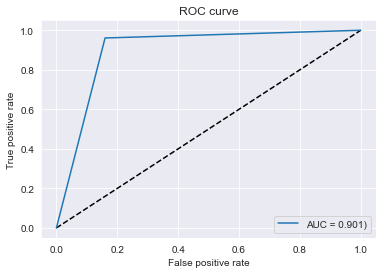

In [28]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()